In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [13]:
train_image = train_image/255.0
test_image = test_image/255.0

In [14]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [15]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [16]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [17]:
test_loss = test_acc = model.evaluate(test_image, test_label)
print(f'Test Accuracy: {test_acc}')
predictions = model.predict(test_image)

313/313 [==============================] - 2s 5ms/step - loss: 2.3303 - accuracy: 0.1079
Test Accuracy: [2.330336093902588, 0.10790000110864639]
313/313 [==============================] - 2s 6ms/step


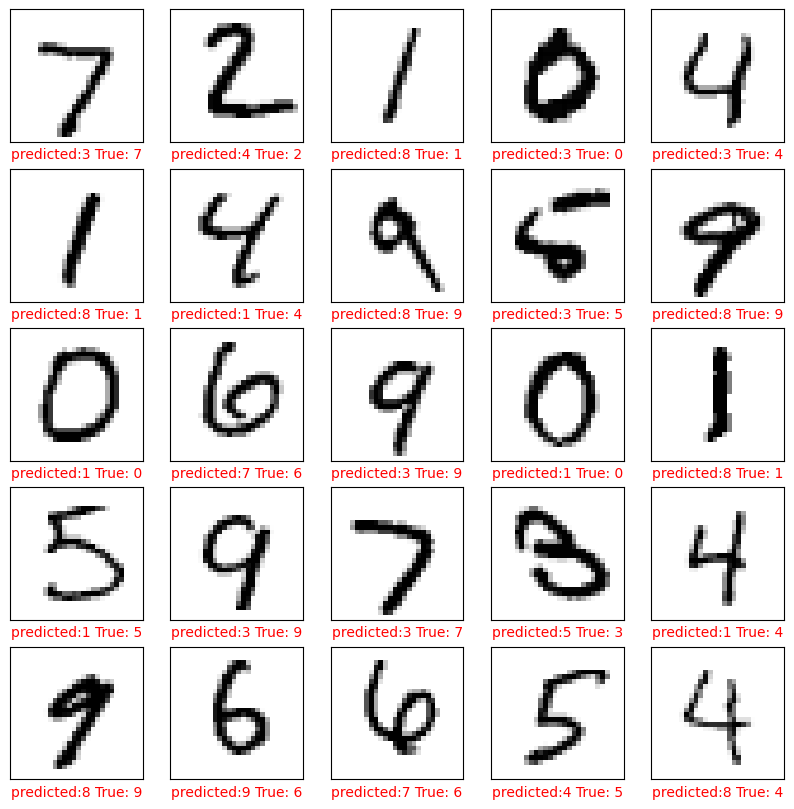

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_image[i], cmap=plt.cm.binary)
  predicted_label = predictions[i].argmax()
  true_label = test_label[i].argmax()
  color = 'blue' if predicted_label == true_label else 'red'
  plt.xlabel(f'predicted:{predicted_label} True: {true_label}', color = color)
plt.show()